In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
x = np.loadtxt('Noisy-data.txt')
y = np.loadtxt('Labels.txt')

In [3]:
m, n = x.shape
print(m, n)

1000 1024


In [4]:
print(x.shape)
print(y.shape)

(1000, 1024)
(1000,)


In [5]:
fs = 1024.                           # sampling frequency
duration = 1.
t = np.arange(0, duration, 1. / fs) # array of time steps

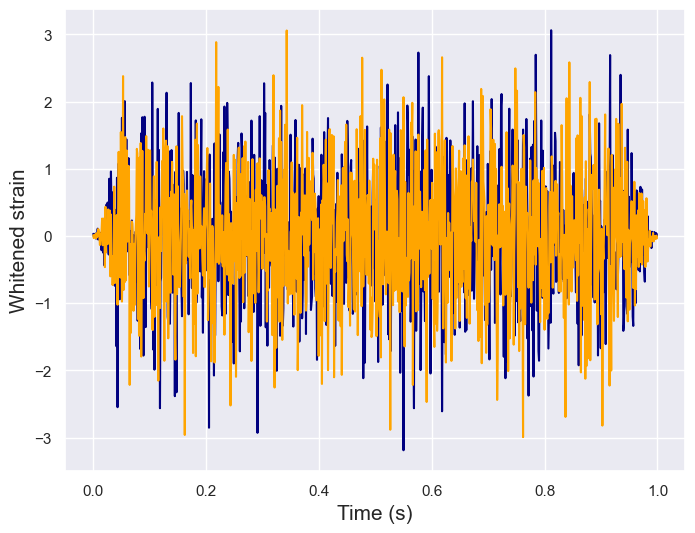

In [6]:
fig = plt.figure(figsize = (8, 6))
plt.plot(t, x[0], color = 'navy')
plt.plot(t, x[1], color = 'orange')
plt.xlabel('Time (s)', fontsize = 15)
plt.ylabel('Whitened strain', fontsize = 15)
plt.show()

In [7]:
num_samples = 1000
time_series_length = 1024
num_classes = 2

In [8]:
# Split into train and test sets
split_ratio = 0.8
split_index = int(num_samples * split_ratio)
X_train, X_test = x[:split_index], x[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [9]:
# Create the 1D CNN model
model = Sequential([
    Conv1D(filters = 64, kernel_size = 3, activation = 'relu', input_shape = (time_series_length, 1)),
    MaxPooling1D(pool_size = 2),
    Dropout(0.25),
    
    Conv1D(filters = 128, kernel_size = 3, activation = 'relu'),
    MaxPooling1D(pool_size = 2),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(num_classes, activation = 'softmax')
])

In [10]:
# Compile the model
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [11]:
# Train the model
model.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_split = 0.2)

Epoch 1/20


2024-06-08 08:53:17.988346: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


20/20 [==============================] - 2s 60ms/step - loss: 1.5141 - accuracy: 0.5266 - val_loss: 0.6790 - val_accuracy: 0.4750
Epoch 2/20
20/20 [==============================] - 1s 48ms/step - loss: 0.6345 - accuracy: 0.5016 - val_loss: 0.6142 - val_accuracy: 0.4750
Epoch 3/20
20/20 [==============================] - 1s 69ms/step - loss: 0.5018 - accuracy: 0.7328 - val_loss: 0.3238 - val_accuracy: 0.9625
Epoch 4/20
20/20 [==============================] - 1s 57ms/step - loss: 0.1942 - accuracy: 0.9484 - val_loss: 0.0946 - val_accuracy: 0.9937
Epoch 5/20
20/20 [==============================] - 1s 52ms/step - loss: 0.0877 - accuracy: 0.9750 - val_loss: 0.0597 - val_accuracy: 1.0000
Epoch 6/20
20/20 [==============================] - 1s 54ms/step - loss: 0.0333 - accuracy: 0.9953 - val_loss: 0.1285 - val_accuracy: 0.9312
Epoch 7/20
20/20 [==============================] - 1s 74ms/step - loss: 0.0317 - accuracy: 0.9953 - val_loss: 0.0302 - val_accuracy: 1.0000
Epoch 8/20
20/20 [======

In [12]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

7/7 [==============================] - 0s 10ms/step - loss: 0.0067 - accuracy: 0.9950
Test accuracy: 0.9950000047683716


In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

7/7 [==============================] - 0s 11ms/step


In [14]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print(f'Confusion matrix:\n{conf_matrix}')

Confusion matrix:
[[ 97   0]
 [  1 102]]


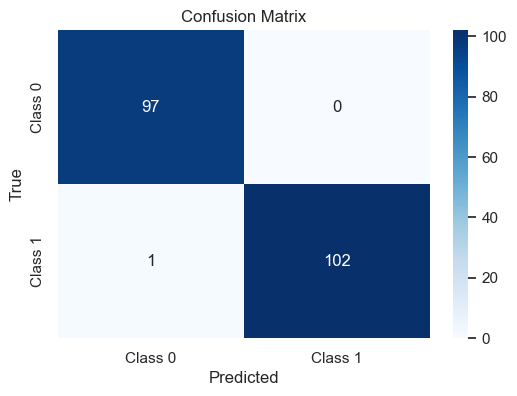

In [15]:
# Plot confusion matrix
plt.figure(figsize = (6, 4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', 
            xticklabels = ['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()